# Gaussian inference - from the Jura data

In [1]:
import matplotlib.pyplot  as plt
import numpy              as np
import scipy as sp
import eas

## Working with 1D data: The Jura data set
The Jura data set contains 259 observations of different properties (such as location, rock type, and different concentrations of chemical substances).  It can be loaded using 


In [2]:
# Read data
DATA     = eas.read(filename='prediction.dat')
d       = DATA['D']
h       = DATA['header']

# Amount of parameters
N       = d.shape[1]

x = d[:,0]
y = d[:,0]
id1 = 6
id2 = 9
d1 = d[:,id1]
d2 = d[:,id2]
useLog = 1
if useLog:
    d2 = np.log(d[:,id2])
nd = d1.shape[0]

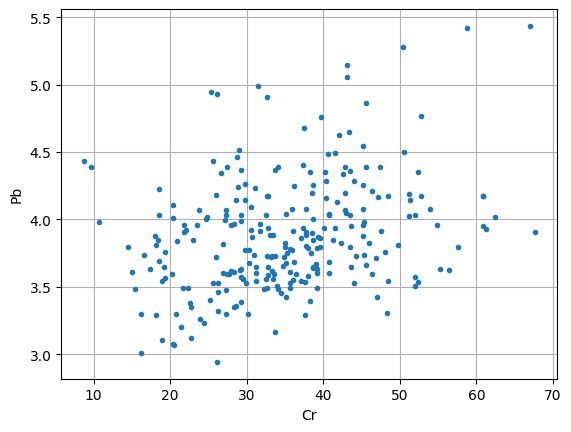

In [3]:
plt.plot(d1,d2,'.')
plt.xlabel(h[id1])
plt.ylabel(h[id2])
plt.grid()

In [4]:
m1 = np.mean(d1)
std1 = np.std(d1)

m2 = np.mean(d2)
std2 = np.std(d2)

cc = np.corrcoef(d1,d2)
C = np.cov(d1,d2)

print('Mean of ',h[id1],' = ',m1)
print('Mean of ',h[id2],' = ',m2)
print('Standard deviation of ',h[id1],' = ',std1)
print('Standard deviation of ',h[id2],' = ',std2)
print('Correlation coefficient = ',cc[0,1])
print('Covariance matrix = ',C)

d1_arr = np.linspace(0,m1+3*std1,10)
d2_arr = np.linspace(0,m2+3*std2,10)

Mean of  Cr  =  35.07011583011583
Mean of  Pb  =  3.885200566628419
Standard deviation of  Cr  =  10.936335014012096
Standard deviation of  Pb  =  0.42340688324927844
Correlation coefficient =  0.31672651208456637
Covariance matrix =  [[120.0670027    1.47229283]
 [  1.47229283   0.17996825]]


Text(0, 0.5, 'pdf')

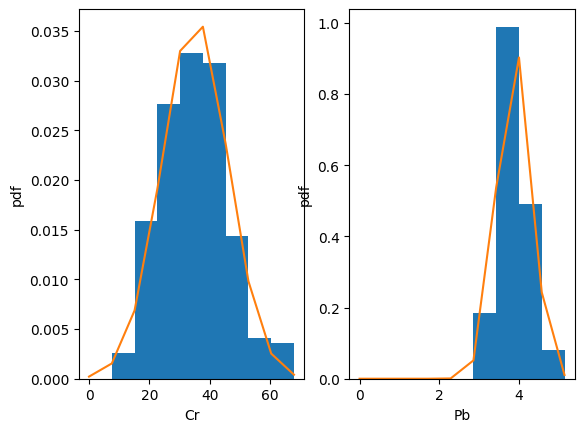

In [5]:
plt.subplot(1,2,1)
plt.hist(d1, bins=d1_arr, density=True)
pdf_1 = np.exp(-0.5*(d1_arr-m1)**2/std1**2)/np.sqrt(2*np.pi*std1**2)
plt.plot(d1_arr,pdf_1)
plt.xlabel(h[id1])
plt.ylabel('pdf')
plt.subplot(1,2,2)
plt.hist(d2, bins=d2_arr, density=True)
pdf_2 = np.exp(-0.5*(d2_arr-m2)**2/std2**2)/np.sqrt(2*np.pi*std2**2)
plt.plot(d2_arr,pdf_2)
plt.xlabel(h[id2])
plt.ylabel('pdf')

Text(0, 0.5, 'Pb')

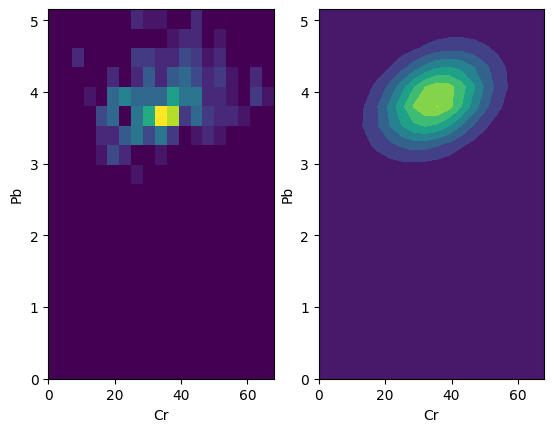

In [6]:
# plot 2D histogram as pdf
d1_arr = np.linspace(0,m1+3*std1,20)
d2_arr = np.linspace(0,m2+3*std2,20)

d1_grid, d2_grid = np.meshgrid(d1_arr,d2_arr)
norm_dist=sp.stats.multivariate_normal(mean=[m1,m2],cov=C)
pdf = norm_dist.pdf(np.dstack((d1_grid,d2_grid)))

plt.subplot(1,2,1)
plt.hist2d(d1, d2, bins=[d1_arr, d2_arr])
plt.xlabel(h[id1])
plt.ylabel(h[id2])
plt.subplot(1,2,2)
# plot the 2D pdf using mean m1 and m2 and covariance C
plt.contourf(d1_grid,d2_grid,pdf)
plt.xlabel(h[id1])
plt.ylabel(h[id2])



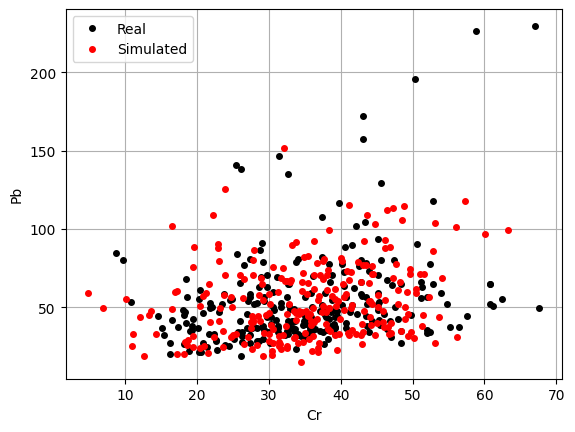

In [7]:
def cholesky_sim(d0, Cd):
    L=np.linalg.cholesky(Cd)
    r = np.random.normal(0,1,d0.shape[0])
    d_star = d0 + np.dot(L,r)
    return d_star

d0 = np.array([m1, m2])
d_real = np.zeros((nd,2))   
for i in range(nd):
    d_real[i,:] =  cholesky_sim(d0, C)


plt.figure()
if useLog:
    plt.plot(d1,np.exp(d2),'k.', markersize=8, label='Real')
    plt.plot(d_real[:,0],np.exp(d_real[:,1]),'r.', markersize=8, label='Simulated')
else:
    plt.plot(d1,d2,'k.', markersize=8, label='Real')
    plt.plot(d_real[:,0],d_real[:,1],'r.', markersize=8, label='Simulated')

plt.xlabel(h[id1])
plt.ylabel(h[id2])
plt.grid()
plt.legend()